In [1]:
#Importing Libraries
import tweepy
from tweepy import OAuthHandler 
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Authorization and Search tweets
#Getting authorization
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'
consumer_key_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXX'
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [48]:
#Defining Search keyword and number of tweets and searching tweets
query =  'covid'
max_tweets = 2000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

Total Positive =  539
Total Negative =  236
Total Neutral =  1225


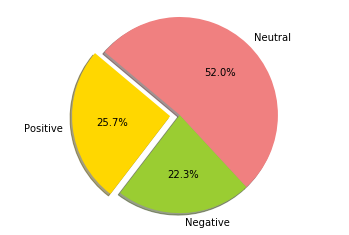

In [45]:
#Sentiment Analysis Report
#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
    else:
       neu = neu + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [5]:
#Creating Dataframe of Tweets
#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])

 #Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data.csv')

In [6]:
tweet_dataset

,tweet_id,text,favorite_count,retweet_count,created_at
0,1283131239885443072,RT @sarperotto: #BC #COVID19 July 14 update: N...,0,19,Tue Jul 14 20:08:21 +0000 2020
1,1283131239134707712,Playing blaming games won't kill corona.\n#COV...,0,0,Tue Jul 14 20:08:21 +0000 2020
2,1283131238690066432,RT @Beam_jirattt: ไม่รู้อะไรก็ออกไปเถอะ ทั้งชี...,0,2919,Tue Jul 14 20:08:21 +0000 2020
3,1283131238581231617,"RT @USAFacts: On average, 3.7 million more adu...",0,3,Tue Jul 14 20:08:21 +0000 2020
4,1283131237696249856,RT @LuminaFound: Historically Black colleges a...,0,11,Tue Jul 14 20:08:21 +0000 2020
...,...,...,...,...,...
1995,1283130500253720577,RT @ajplus: BREAKING: The Trump administration...,0,471,Tue Jul 14 20:05:25 +0000 2020
1996,1283130500178157569,RT @SkyTG24: #Covid19\nGli aggiornamenti in di...,0,3,Tue Jul 14 20:05:25 +0000 2020
1997,1283130499150622721,RT @LopezFlores_: La buena noticia es que grac...,0,26,Tue Jul 14 20:05:25 +0000 2020
1998,1283130498475335687,RT @drfahrettinkoca: TEKRAR 1.000’İN ALTINDAYI...,0,6592,Tue Jul 14 20:05:24 +0000 2020


In [7]:
tweet_dataset.shape

(2000, 5)

In [8]:
tweet_dataset.head

<bound method NDFrame.head of                  tweet_id                                               text  \
0     1283131239885443072  RT @sarperotto: #BC #COVID19 July 14 update: N...   
1     1283131239134707712  Playing blaming games won't kill corona.\n#COV...   
2     1283131238690066432  RT @Beam_jirattt: ไม่รู้อะไรก็ออกไปเถอะ ทั้งชี...   
3     1283131238581231617  RT @USAFacts: On average, 3.7 million more adu...   
4     1283131237696249856  RT @LuminaFound: Historically Black colleges a...   
...                   ...                                                ...   
1995  1283130500253720577  RT @ajplus: BREAKING: The Trump administration...   
1996  1283130500178157569  RT @SkyTG24: #Covid19\nGli aggiornamenti in di...   
1997  1283130499150622721  RT @LopezFlores_: La buena noticia es que grac...   
1998  1283130498475335687  RT @drfahrettinkoca: TEKRAR 1.000’İN ALTINDAYI...   
1999  1283130498148179968  RT @disclosetv: BREAKING - Trump administratio...   

      fav

In [9]:
#Cleaning Data
#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
     
    return input_txt 

tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1283131239885443072,RT : #BC #COVID19 July 14 update: Number of ca...,0,19,Tue Jul 14 20:08:21 +0000 2020
1,1283131239134707712,Playing blaming games won't kill corona.\n#COV...,0,0,Tue Jul 14 20:08:21 +0000 2020
2,1283131238690066432,RT : ไม่รู้อะไรก็ออกไปเถอะ ทั้งชีวิตนี่รู้อะไร...,0,2919,Tue Jul 14 20:08:21 +0000 2020
3,1283131238581231617,"RT : On average, 3.7 million more adults are h...",0,3,Tue Jul 14 20:08:21 +0000 2020
4,1283131237696249856,RT : Historically Black colleges are a corners...,0,11,Tue Jul 14 20:08:21 +0000 2020


In [10]:
tweet_dataset['text'].head()

0    RT : #BC #COVID19 July 14 update: Number of ca...
1    Playing blaming games won't kill corona.\n#COV...
2    RT : ไม่รู้อะไรก็ออกไปเถอะ ทั้งชีวิตนี่รู้อะไร...
3    RT : On average, 3.7 million more adults are h...
4    RT : Historically Black colleges are a corners...
Name: text, dtype: object

In [11]:
#Cleaning Tweets
corpus = []
for i in range(0, 2000):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet_dataset['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

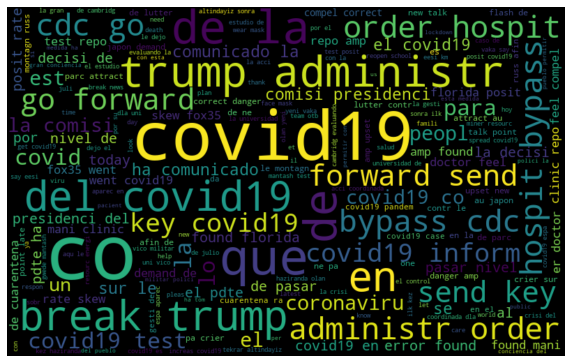

In [12]:
#Visualization
#Word Cloud
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [40]:
#Term Freuency - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweet_dataset['text'])
#Count Most Frequent Words
Countervar= Counter(corpus)
most_occur = Countervar.most_common(10) 
print(most_occur)

[('break trump administr order hospit bypass cdc go forward send key covid19 inform w', 97), ('error found florida posit rate skew fox35 went covid19 test repo amp found mani clinic repo 1', 41), ('er doctor feel compel correct danger amp upset new talk point late', 40), ('flash de parc attract au japon demand de ne pa crier sur le montagn russ afin de lutter contr le', 38), ('el pdte ha comunicado la comisi n presidenci del covid19 la decisi n de pasar nivel de cuarentena ra', 34), ('tekrar 1 000 n altindayiz 33 g n sonra ilk kez 11 haziranda 987 olan yeni vaka say eesi g n 1 195 e km', 28), ('aqu le dejo el estudio de la universidad de cambridg evaluando la gesti n de la crisi del covid19 espa aparec en', 22), ('la acci n coordinada dla uni n c vico militar polici la gran conciencia del pueblo permitir n con esta medida q ha tom', 15), ('dear increas covid19 test caus american die exactli opposit stop complain', 14), ('covid19', 12)]
